In [1]:
#import dependencies to read the files 
import os 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json

In [2]:
# File to Load
file_to_load = "netflix_titles_CLEANSEDcsv.csv"

# Read Purchasing File and store into Pandas data frame
Netflix_Titles = pd.read_csv(file_to_load)

Netflix_Titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
different_ratings= Netflix_Titles["rating"].unique()
different_ratings

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [4]:
director_column= Netflix_Titles.loc[:, "director"]
cast_column= Netflix_Titles.loc[:, "cast"]
rating_column= Netflix_Titles.loc[:, "rating"]

In [5]:
new_df= pd.DataFrame({"Director": director_column, "Cast": cast_column, "Rating": rating_column})

In [6]:
new_df= new_df.dropna()

Director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Name: Rating, Length: 3709, dtype: int64

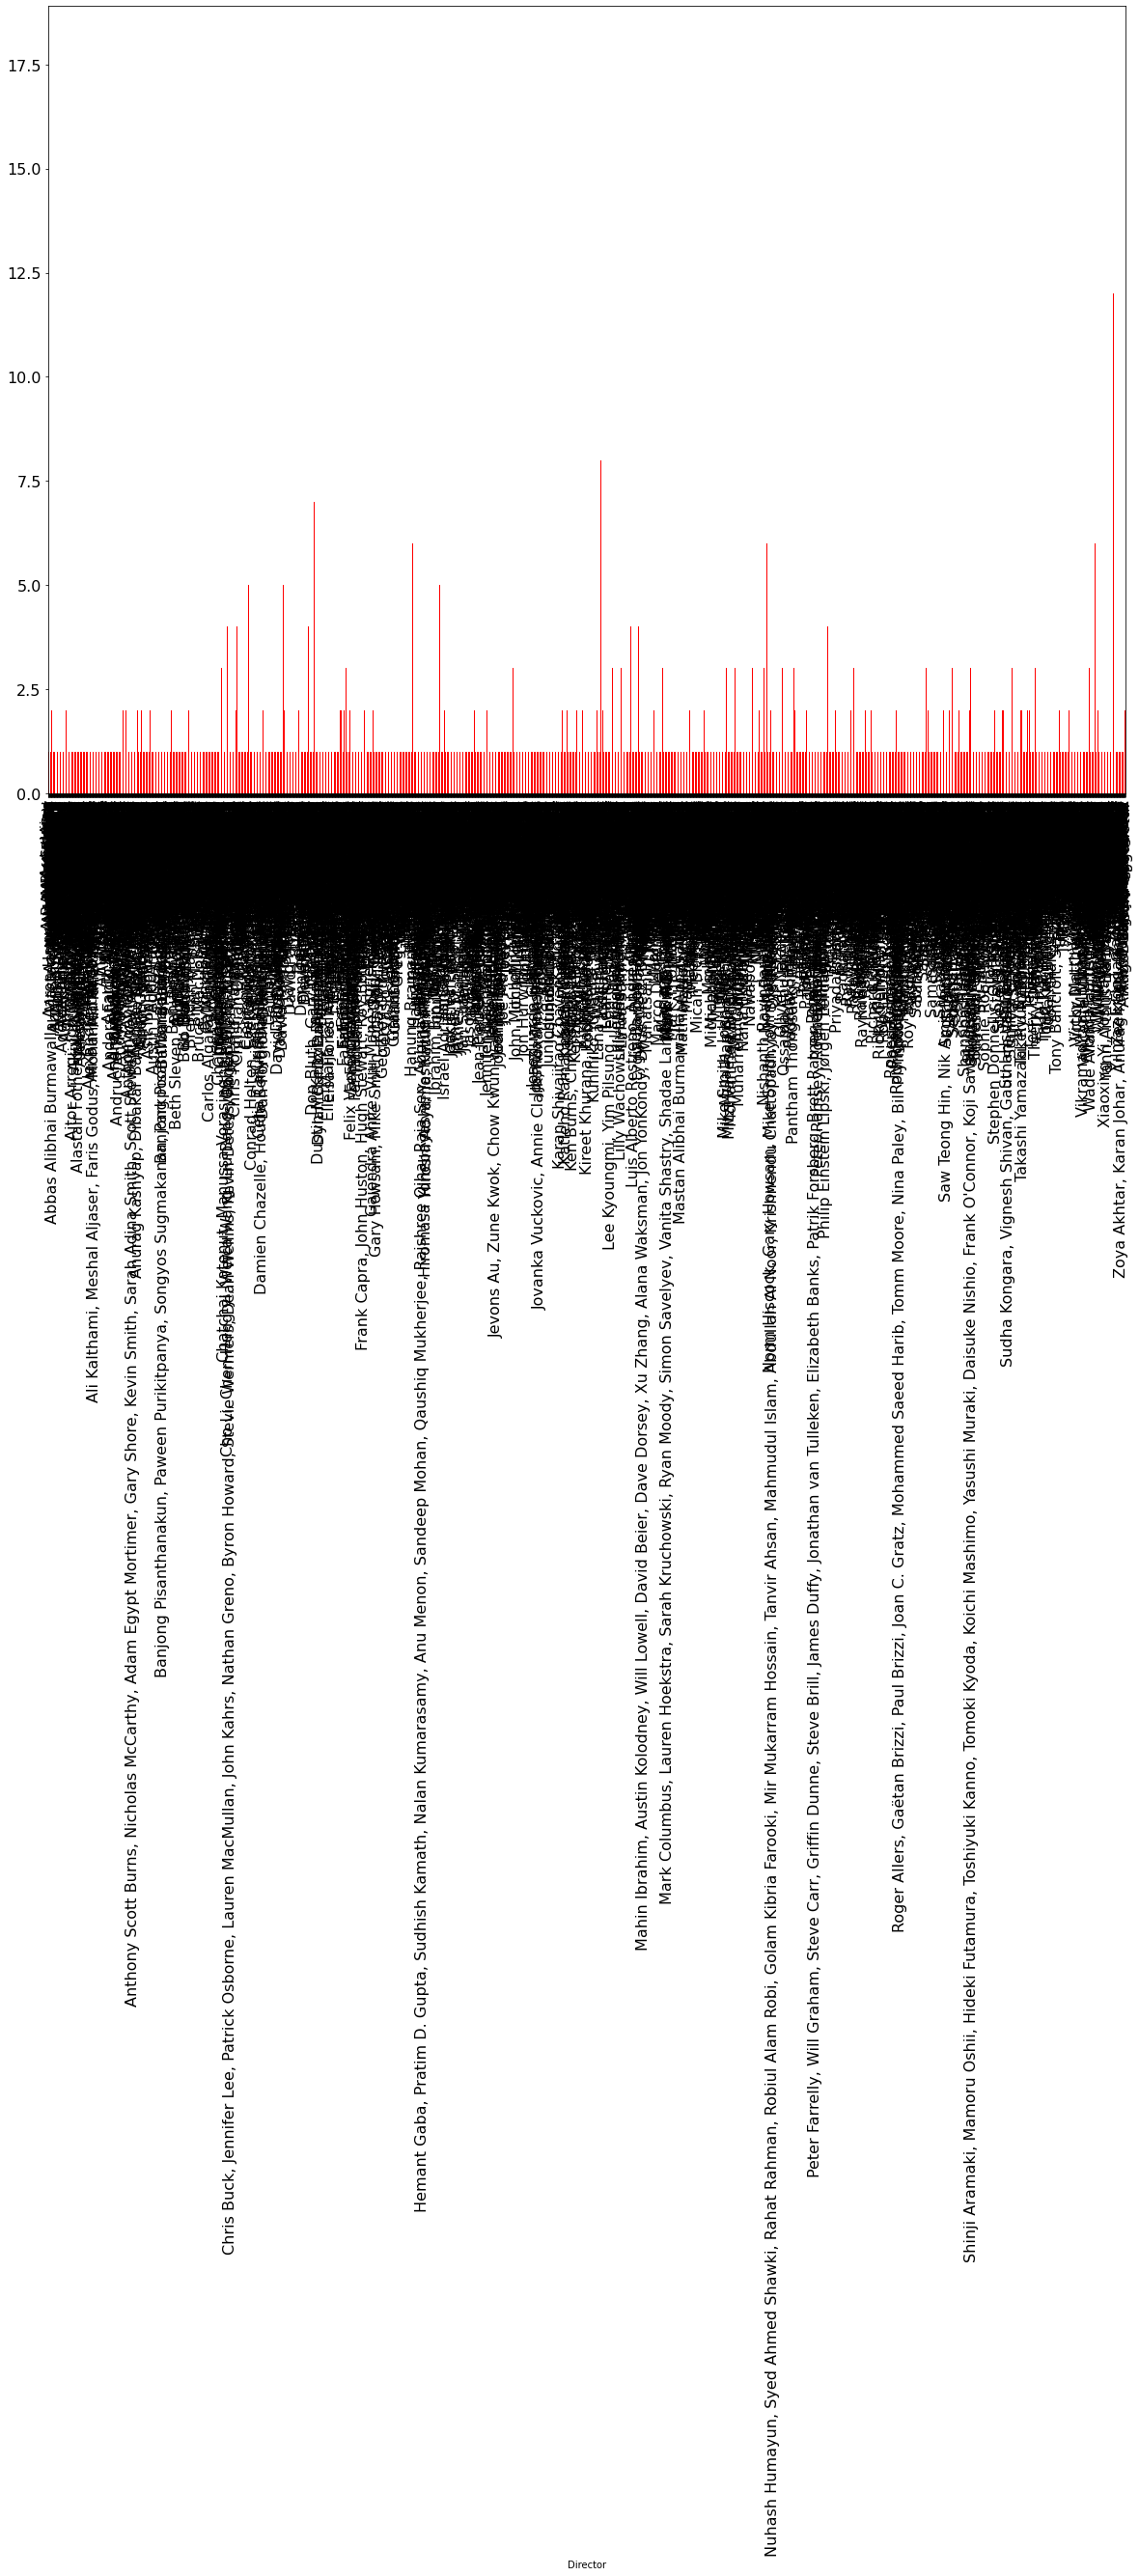

In [7]:
treated_data= new_df.groupby(["Director"]).count()["Rating"]
plotting_treated= treated_data.plot.bar(figsize=(20,15),color='r', fontsize= 16)
treated_data

In [7]:
new_director_df= pd.DataFrame({"Director": director_column, "Rating": rating_column})

In [8]:
grouped= new_director_df.groupby(["Director"]).count()["Rating"]
grouped= pd.DataFrame(grouped)

,Rating
Director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [9]:
is_long= grouped.Rating >1

Director
A. L. Vijay         True
A. Raajdheep       False
A. Salaam          False
A.R. Murugadoss     True
Aadish Keluskar    False
Name: Rating, dtype: bool

In [10]:
more_than_1= pd.DataFrame(grouped[is_long])
len(more_than_1)
print("There are 736 directors that have worked on 2 or more Netflix titles")

There are 736 directors that have worked on 2 or more Netflix titles


In [13]:
groupby_column = 'Director'
aggregate_column = 'Rating'
agg_df = new_df.groupby(groupby_column).aggregate({aggregate_column:list})
# create a dataframe of values without the aggregation column ready to join
df_alias = new_df.drop(columns=aggregate_column).\
set_index(groupby_column)
    
# join the aliases on and clean up the result
out_df = agg_df.join(df_alias).\
reset_index(groupby_column).\
drop_duplicates(groupby_column).\
reset_index(drop=True)
    
rating_agg_df= pd.DataFrame(out_df)
rating_agg_df

,Director,Rating,Cast
0,A. L. Vijay,"[TV-14, TV-14]","Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt..."
1,A. Raajdheep,[TV-14],"Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi..."
2,A. Salaam,[TV-14],"Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud..."
3,A.R. Murugadoss,"[TV-MA, TV-14]","Vijay, Varalakshmi Sarathkumar, Keerthi Suresh..."
4,Aadish Keluskar,[TV-MA],"Khushboo Upadhyay, Rohit Kokate, Himanshu Kohl..."
...,...,...,...
3704,Çagan Irmak,[TV-14],"Çetin Tekindor, Fikret Kuşkan, Hümeyra, Ege Ta..."
3705,Ísold Uggadóttir,[TV-14],"Kristín Thóra Haraldsdóttir, Babetida Sadjo..."
3706,Óskar Thór Axelsson,[TV-MA],"Jóhannes Haukur Jóhannesson, Ágústa Eva Erlend..."
3707,Ömer Faruk Sorak,"[TV-MA, TV-MA]","Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta..."


In [14]:
rating_agg_df.to_excel(r'test_excel/director.xlsx', index = False)

In [26]:
filtered_ratings = pd.read_csv (r'test_excel/Director_w_rating.csv')
filtered_ratings

,Director,Rating,Cast
0,A. L. Vijay,"['TV-14', 'TV-14']","Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt..."
1,Aanand Rai,"['TV-14', 'TV-14']","Madhavan, Kangana Ranaut, Jimmy Shergill, Deep..."
2,Aaron Sorkin,"['R', 'R']","Jessica Chastain, Idris Elba, Kevin Costner, M..."
3,Abba T. Makama,"['TV-MA', 'TV-MA']","Ifeanyi Dike Jr., Jamal Ibrahim, Samuel Robins..."
4,"Abbas Alibhai Burmawalla, Mastan Alibhai Burma...","['TV-14', 'TV-PG', 'TV-14', 'TV-14']","Akshay Kumar, Kareena Kapoor, Priyanka Chopra,..."
...,...,...,...
434,Zoe Berriatúa,"['TV-MA', 'TV-MA']","Emilio Palacios, Jorge Clemente, Beatriz Medin..."
435,Zoya Akhtar,"['TV-MA', 'TV-14', 'TV-14']","Anil Kapoor, Priyanka Chopra, Ranveer Singh, A..."
436,Álex de la Iglesia,"['TV-MA', 'TV-MA']","Raphael, Mario Casas, Pepón Nieto, Blanca Suár..."
437,Ömer Faruk Sorak,"['TV-MA', 'TV-MA']","Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta..."


In [28]:
len(filtered_ratings)
print("There are 439 Directors that have worked on multiple Netflix projects, at least 2 of which have the same rating")

There are 439 Directors that have worked on multiple Netflix projects, at least 2 of which have the same rating


In [40]:
test= filtered_ratings.loc[filtered_ratings["Director"] == "Raúl Campos, Jan Suter"]
test

,Director,Rating,Cast
308,"Raúl Campos, Jan Suter","['TV-MA', 'TV-MA', 'TV-MA', 'TV-MA', 'TV-MA', ...",Alan Saldaña


In [15]:
rating_agg_df['Rating'] = rating_agg_df['Rating'].astype(str)
  
print()
  
# lets find out the data
# type after changing
print(rating_agg_df.dtypes)
  
# print dataframe. 
rating_agg_df


Director    object
Rating      object
Cast        object
dtype: object


,Director,Rating,Cast
0,A. L. Vijay,"['TV-14', 'TV-14']","Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt..."
1,A. Raajdheep,['TV-14'],"Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi..."
2,A. Salaam,['TV-14'],"Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud..."
3,A.R. Murugadoss,"['TV-MA', 'TV-14']","Vijay, Varalakshmi Sarathkumar, Keerthi Suresh..."
4,Aadish Keluskar,['TV-MA'],"Khushboo Upadhyay, Rohit Kokate, Himanshu Kohl..."
...,...,...,...
3704,Çagan Irmak,['TV-14'],"Çetin Tekindor, Fikret Kuşkan, Hümeyra, Ege Ta..."
3705,Ísold Uggadóttir,['TV-14'],"Kristín Thóra Haraldsdóttir, Babetida Sadjo..."
3706,Óskar Thór Axelsson,['TV-MA'],"Jóhannes Haukur Jóhannesson, Ágústa Eva Erlend..."
3707,Ömer Faruk Sorak,"['TV-MA', 'TV-MA']","Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta..."


In [16]:
rating_agg_df.shape

(3709, 3)

In [17]:
#array of all ratings(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
#'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)
#Find counts of how many of each rating are in each row
#then do the boolean to keep only >1 
TV_MA_count= rating_agg_df.Rating.str.count("TV-MA")
R_count= rating_agg_df.Rating.str.count("R")
PG_13_count= rating_agg_df.Rating.str.count("PG-13")
TV_14_count= rating_agg_df.Rating.str.count("TV-14")
TV_PG_count= rating_agg_df.Rating.str.count("TV-PG")
NR_count= rating_agg_df.Rating.str.count("NR")
TV_G_count= rating_agg_df.Rating.str.count("TV-G")
TV_Y_count= rating_agg_df.Rating.str.count("TV-Y")
nan_count= rating_agg_df.Rating.str.count("nan")
TV_Y7_count= rating_agg_df.Rating.str.count("TV-Y7")
PG_count= rating_agg_df.Rating.str.count("PG")
G_count= rating_agg_df.Rating.str.count("G")
NC_17_count= rating_agg_df.Rating.str.count("NC-17")
TV_Y7_FV_count= rating_agg_df.Rating.str.count("TV-Y7-FV")
UR_count= rating_agg_df.Rating.str.count("UR")

In [18]:
TV_MA_countdf= pd.DataFrame({"Director": director_column, "TV MA": TV_MA_count})
TV_MA_countdf

,Director,TV MA
0,NaN,0.0
1,Jorge Michel Grau,0.0
2,Gilbert Chan,0.0
3,Shane Acker,1.0
4,Robert Luketic,1.0
...,...,...
7782,Josef Fares,NaN
7783,Mozez Singh,NaN
7784,NaN,NaN
7785,NaN,NaN


In [19]:
idk= pd.DataFrame({"Director":director_column, "TV MA": TV_MA_count, "R": R_count,
                   "PG-13":PG_13_count, "TV-14": TV_14_count, 
                   "TV-PG":TV_PG_count, "NR":NR_count, "TV-G": TV_G_count, 
                   "TV-Y": TV_Y_count,"nan": nan_count,"TV-Y7":TV_Y7_count,
                  "PG":PG_count, "G": G_count, "NC-17": NC_17_count,
                 "TV-Y7-FV": TV_Y7_FV_count,"UR": UR_count})
idk.dropna()

,Director,TV MA,R,PG-13,TV-14,TV-PG,NR,TV-G,TV-Y,nan,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR
1,Jorge Michel Grau,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gilbert Chan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Shane Acker,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Robert Luketic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Serdar Akar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,Sudhanshu Saria,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3704,Michael Anderson,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3705,Eduardo Roy Jr.,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3707,Stanley Kubrick,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
new_df_2= new_df['Cast'].str.split(',', n=-1, expand=True)

In [21]:
cast_df= pd.DataFrame(new_df_2)
cast_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
1,Demián Bichir,Héctor Bonilla,Oscar Serrano,Azalia Ortiz,Octavio Michel,Carmen Beato,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Tedd Chan,Stella Chung,Henley Hii,Lawrence Koh,Tommy Kuan,Josh Lai,Mark Lee,Susan Leong,Benjamin Lim,None,...,None,None,None,None,None,None,None,None,None,None
3,Elijah Wood,John C. Reilly,Jennifer Connelly,Christopher Plummer,Crispin Glover,Martin Landau,Fred Tatasciore,Alan Oppenheimer,Tom Kane,None,...,None,None,None,None,None,None,None,None,None,None
4,Jim Sturgess,Kevin Spacey,Kate Bosworth,Aaron Yoo,Liza Lapira,Jacob Pitts,Laurence Fishburne,Jack McGee,Josh Gad,Sam Golzari,...,None,None,None,None,None,None,None,None,None,None
5,Erdal Beşikçioğlu,Yasemin Allen,Melis Birkan,Saygın Soysal,Berkan Şal,Metin Belgin,Ayça Eren,Selin Uludoğan,Özay Fecht,Suna Yıldızoğlu,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7780,Shashank Arora,Shweta Tripathi,Rahul Kumar,Gopal K. Singh,Yogesh Kurme,Prince Daniel,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7781,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None
7782,Imad Creidi,Antoinette Turk,Elias Gergi,Carmen Lebbos,Viktor Axelsson,Charbel Iskandar,Yasmine Awad,None,None,None,...,None,None,None,None,None,None,None,None,None,None
